# Investigate Hotel Business using Data Visualization

## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

pd.options.display.max_columns = None
rcParams['figure.figsize'] = (12,8)

In [2]:
plt.style.use('ggplot')

The dataset used is distributed by Rakamin Academy based on [Hotel Booking Demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) dataset.

In [3]:
filepath = "hotel_bookings_data.csv"

df_raw = pd.read_csv(filepath)
df = df_raw.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Data Pre-Processing
The task for this step is to do data preprocessing to transform the raw data into clean and ready to use. Some recommendations to do for this step are as follows:
- Handling missing values
- Fixing inconsistent or wrong values
- Removing unnecessary datas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The descriptions for each columns are taken from the original dataset source as following:
- **hotel**: Types of hotel, divided into 'Resort Hotel' and 'City Hotel'
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_weekdays_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Numbers of adults
- **children**: Numbers of children
- **babies**: Numbers of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **city**: Cities of origin
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0) 
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

Based on observation from dataset source and dataframe's info, there are some binary columns categorized as numerical like **is_canceled** and **is_repeated_guest**. The **children** column should be integer instead of float since human counting is discreet by nature. The **agent** and **company** column should be object isntead of float, because id is not numerical (not math operable).

Possible important column is most likely **is_cancelled** column that indicates cancellation rate. Cancellations can affect overall revenue due to vacant rooms contribute to net loss for that day (source: [HotelMinder](https://www.hotelminder.com/everything-you-need-to-know-about-hotel-cancellations)). 

In [5]:
# Validating columns' datatype
df[['is_canceled', 'is_repeated_guest']] = df[['is_canceled', 'is_repeated_guest']].astype('object')
df[['children']] = df[['children']].astype('int', errors='ignore')
df[['agent', 'company']] = df[['agent', 'company']].astype('object', errors='ignore')

df[['is_canceled', 'is_repeated_guest', 'children', 'agent', 'company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_canceled        119390 non-null  object 
 1   is_repeated_guest  119390 non-null  object 
 2   children           119386 non-null  float64
 3   agent              103050 non-null  object 
 4   company            6797 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


It appears that **children** column datatype can't be changed until missing values are handled.

### Duplicated Values

In [6]:
df[(df.duplicated(keep=False))].head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
21,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
39,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out


There are some duplicated rows found. While there are some cases where 2 or more groups share similarity in their bookings, it is unlikely to share similarity in everything. These duplicated rows will be dropped to avoid overrepresentation for certain values.

In [7]:
dupes = df.duplicated().sum()
print(f'There are {dupes} rows of duplicates ({dupes * 100 / df.shape[0]:.2f}% total data)')

There are 33261 rows of duplicates (27.86% total data)


In [8]:
print(f'Total rows before dropping duplicates: {df.shape[0]}')
df.drop_duplicates(inplace=True)
print(f'Total rows after dropping duplicates: {df.shape[0]}')

Total rows before dropping duplicates: 119390
Total rows after dropping duplicates: 86129


### Missing Values

In [9]:
# Checking for columns with missing values
miss_val = {}

for col in df.columns:
    if df[col].isna().sum() > 0:
        miss_val[col] = df[col].isna().sum()

print("Columns with their sum of missing values:")
for key in miss_val:
    print(f'\t{key.ljust(10)}: {str(miss_val[key]).rjust(6)}')

print("\nColumns with their percentage of missing values:")
for key in miss_val:
    miss_percent = round(miss_val[key] / df.shape[0] * 100, 3)
    print(f'\t{key.ljust(10)}: {str(miss_percent).rjust(6)}%')

Columns with their sum of missing values:
	children  :      4
	city      :    450
	agent     :  11941
	company   :  81019

Columns with their percentage of missing values:
	children  :  0.005%
	city      :  0.522%
	agent     : 13.864%
	company   : 94.067%


Based from understanding and columns' descriptions, these columns will be handled for the following reasons:
- **children**: missing value here can have the same meaning of having 0 child
- **city**: missing value can be interpretted that the customer's city of origin is not on the list or might be from abroad
- **agent** and **company**: missing value here means that this column is 'not applicable' due to the booking is not made by an agent and/or a company

**Children** column will also be changed to be int just like **adults** and **babies**.

In [10]:
# Missing values in children > 0
df['children'].fillna(0, inplace=True)
df['children'] = df['children'].astype('int64')

# Missing values in city > 'Others'
df['city'].fillna('Others', inplace=True)

# Missing values in agent and company > 'Not Applicable'
df['agent'].fillna('Not Applicable', inplace=True)
df['company'].fillna('Not Applicable', inplace=True)

# Remove decimal points in agent and company
df['agent'] = df['agent'].apply(lambda x: str(x).split('.')[0])
df['company'] = df['company'].apply(lambda x: str(x).split('.')[0])

df[['children', 'city', 'agent', 'company']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   children  86129 non-null  int64 
 1   city      86129 non-null  object
 2   agent     86129 non-null  object
 3   company   86129 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


### Descriptive Analysis

In [11]:
# Separate categorical and numerical columns
cats = df.select_dtypes(include='object').columns
nums = df.drop(df[cats], axis=1).columns

#### Numerical Columns

In [12]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,86129.0,79.246224,85.498774,0.00,11.00,49.00,124.00,737.0
arrival_date_year,86129.0,2018.215467,0.683948,2017.00,2018.00,2018.00,2019.00,2019.0
arrival_date_week_number,86129.0,26.796433,13.675130,1.00,16.00,27.00,37.00,53.0
arrival_date_day_of_month,86129.0,15.806511,8.840436,1.00,8.00,16.00,23.00,31.0
stays_in_weekend_nights,86129.0,1.009753,1.033402,0.00,0.00,1.00,2.00,19.0
stays_in_weekdays_nights,86129.0,2.633225,2.058316,0.00,1.00,2.00,4.00,50.0
adults,86129.0,1.878554,0.627558,0.00,2.00,2.00,2.00,55.0
children,86129.0,0.140278,0.458337,0.00,0.00,0.00,0.00,10.0
babies,86129.0,0.010984,0.114421,0.00,0.00,0.00,0.00,10.0
previous_cancellations,86129.0,0.030570,0.371465,0.00,0.00,0.00,0.00,26.0


Based on table above, there are a few interesting points that need investigating:
- ***Total stay duration***: the min values for **stays_in_weekend_nights** and **stays_in_weedays_nights** are 0. On the case where the sum of both values are 0 in a single booking would mean that there is no stay being made
- ***Total guests***: it's necessary to filter for sum of adults and children to be more than 0, since a combination of 0 adults, 0 children, 1 babies will not make sense
- ***Negative ADR***: since ADR is calculated by dividing lodging transactions by stay durations, having negative ADR would mean the hotel losing money every day for having that room occupied
- ***Extreme Outlier ADR***: the max value in **adr** seems to be extreme compared to the median

In [13]:
# Total stay duration of 0
df_0_dur = df[np.sum([df.stays_in_weekdays_nights, df.stays_in_weekend_nights], axis=0) == 0]
display(df_0_dur.head())
print(f'There are {df_0_dur.shape[0]} rows with total stay durations of 0.')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,Not Applicable,Not Applicable,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,Not Applicable,Not Applicable,0,Personal,0.0,0,0,Check-Out
167,Resort Hotel,0,111,2017,September,28,6,0,0,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,Not Applicable,0,Personal,0.0,0,2,Check-Out
168,Resort Hotel,0,0,2017,September,28,6,0,0,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,250,Not Applicable,0,Personal,0.0,0,0,Check-Out
196,Resort Hotel,0,8,2017,September,28,7,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,Not Applicable,Not Applicable,0,Personal,0.0,0,1,Check-Out


There are 645 rows with total stay durations of 0.


In [14]:
# Sum adults and children guest = 0
df_0_guest = df[np.sum([df.adults, df.children], axis=0) == 0]
display(df_0_guest.head())
print(f'There are {df_0_guest.shape[0]} rows with no adults and no children')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,Not Applicable,174,0,Family,0.0,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,Not Applicable,174,0,Personal,0.0,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38,Not Applicable,0,Family,0.0,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308,Not Applicable,122,Family,0.0,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308,Not Applicable,122,Family,0.0,0,0,Check-Out


There are 165 rows with no adults and no children


In [15]:
# Negative ADR
df_adr_neg = df[df.adr < 0]
display(df_adr_neg)
print(f'There are {df_adr_neg.shape[0]} row negative adr')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14969,Resort Hotel,0,195,2019,May,10,5,4,6,2,0,0,Breakfast,Kabupaten Bangka,Groups,Direct,1,0,2,2,No Deposit,273,Not Applicable,0,Family,-6.38,0,0,Check-Out


There are 1 row negative adr


In [16]:
# Extreme ADR compared to other highest ADR
df_adr_out = df.sort_values(by='adr').tail()
df_adr_out

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
13142,Resort Hotel,1,378,2019,October,31,1,4,10,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,314,Not Applicable,0,Personal,450.0,0,0,Canceled
103912,City Hotel,0,81,2018,February,53,31,1,1,2,2,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,Not Applicable,Not Applicable,0,Family,451.5,0,4,Check-Out
15083,Resort Hotel,0,1,2017,September,29,15,0,1,2,0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,0,1,0,No Deposit,Not Applicable,Not Applicable,0,Personal,508.0,1,0,Check-Out
111403,City Hotel,0,0,2019,July,19,9,0,1,1,0,0,Breakfast,Kabupaten Kepulauan Seribu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,159,Not Applicable,0,Personal,510.0,0,0,Check-Out
48515,City Hotel,1,35,2018,May,13,25,0,1,2,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,Non Refund,12,Not Applicable,0,Personal,5400.0,0,0,Canceled


For bookings with sum of stay duration and sum of guests with 0 values will be dropped.

For the booking data with negative adr values, it appears that this booking is made by a *repeat guest* with no deposit in front through agent '273'. Since their reservation status is 'Check-Out', it's likely that this is a real transaction where they use pay later so the negative value might tell how much the guests owed the hotel.

For the booking data with extreme adr values of 5400, it is unsure if the value is due to an error in imputation or not. Upon observation however, the total stay duration for this booking is just 1 night, so there is a possibility that this booking is made for a special occassion.

In [17]:
df_sus_trx = pd.concat([df_0_dur, df_0_guest])

print(f'Total rows before deleting suspicious guest sum: {df.shape[0]}')
df.drop(df_sus_trx.index, inplace=True)
print(f'Total rows after deleting suspicious guest sum: {df.shape[0]}')

Total rows before deleting suspicious guest sum: 86129
Total rows after deleting suspicious guest sum: 85378


#### Categorical Column

In [18]:
df[cats].describe().T

,count,unique,top,freq
hotel,85378,2,City Hotel,52191
is_canceled,85378,2,0,61681
arrival_date_month,85378,12,October,11088
meal,85378,5,Breakfast,66532
city,85378,178,Kota Denpasar,26320
market_segment,85378,8,Online TA,51062
distribution_channel,85378,5,TA/TO,67653
is_repeated_guest,85378,2,0,82244
deposit_type,85378,3,No Deposit,84273
agent,85378,334,9,28524


In [19]:
print('Unique values for each columns:')
for col in cats:
    # Skip columns with high amount of unique values
    if col in ['city', 'agent', 'company']:
        continue
    print(f'{col}:\n\t{df[col].unique()}\n')

Unique values for each columns:
hotel:
	['Resort Hotel' 'City Hotel']

is_canceled:
	[0 1]

arrival_date_month:
	['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

meal:
	['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']

market_segment:
	['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel:
	['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

is_repeated_guest:
	[0 1]

deposit_type:
	['No Deposit' 'Refundable' 'Non Refund']

customer_type:
	['Personal' 'Contract' 'Family' 'Bussiness']

reservation_status:
	['Check-Out' 'Canceled' 'No-Show']



There are 'Undefined' values within the following columns:
- **meal**: from the original dataset source, it is defined that 'Undefined' values in this column means that the guests didn't choose any meal plan, so it's supposed to be the same as 'No Meal' plan
- **market_segment**: hotel market segment designation has various sub-segments, for example 'Aviation' can actually be classified as sub-segment of 'Corporate' or 'Groups'. That being said, 'Undefined' might mean it's part of other sub-segments not covered before (source: [cvent](https://www.cvent.com/en/blog/hospitality/hotel-market-segmentation))
- **distribution_channel**: just like market segment, 'Undefined' might mean that it's part of distribution channel outside the ones already covered (source: [cvent](https://www.cvent.com/en/blog/hospitality/hotel-distribution-channels))

One thing to nitpick will be in **market_segment** column for the value 'Complementary' should be 'Complimentary' instead, where 'Complimentary Rooms' defined as 'free rooms provided to any guest, for marketing purposes' in hotel industry (source: [hotelmanagement.net](https://www.hotelmanagement.net/operate/hotels-give-to-receive-analysis-complimentary-services-and-rooms)).

In [20]:
# Change values in meal, 'Undefined' > 'No Meal' 
df['meal'].replace('Undefined', 'No Meal', inplace=True)

# Change values in market segment, 'Complementary' > 'Complimentary'
df['market_segment'].replace('Complementary', 'Complimentary', inplace=True)

In [21]:
# Validate values in city
df['city'].sort_values().unique()[-10:]

array(['Kota Tangerang', 'Kota Tangerang Selatan', 'Kota Tarakan',
       'Kota Tasikmalaya', 'Kota Tegal', 'Kota Ternate',
       'Kota Tidore Kepulauan', 'Kota Yogyakarta', 'Medan', 'Others'],
      dtype=object)

Based on observation above, there is a value 'Medan' that doesn't have 'Kota' prefix like others which might indicates that the value inputted in this column might not be standardized. With that in mind, it's possible that some values in **city** might have imputation error where some city names are duplicated but with different prefix. For example some **city** value could be 'Kota Bandung' while some others will have 'Kabupaten Bandung'.

In [22]:
def remove_city_prefix(city):
    city = city.split(' ')
    if city[0].lower() in ['kota', 'kabupaten']:
        return (' ').join(city[1:])
    else:
        return (' ').join(city)
    
print(f'Unique values in city before prefix removal: {df.city.unique().shape[0]}')
df['city'] = df['city'].apply(lambda x: remove_city_prefix(x))
print(f'Unique values in city after prefix removal: {df.city.unique().shape[0]}')

Unique values in city before prefix removal: 178
Unique values in city after prefix removal: 158


## Monthly Hotel Booking Analysis Based on Hotel Type
The task for this step is to analyze hotel guests' behaviors in booking based on hotel type and month. The objective is to find what type of hotel and month where guests are more likely to book, thus increasing potential revenue.


### Aggregating Values to Find Total Booking

In [23]:
# Make list for sorting month
month_order = ['January', 'February', 'March', 'April',
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

In [24]:
df_gb_hotel = df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year'])\
                        .agg({'hotel': 'count'})\
                        .rename(columns={'hotel' : 'total_booking'})\
                        .reset_index()
df_gb_hotel.drop(df_gb_hotel[df_gb_hotel.total_booking == 0].index, inplace=True)
df_gb_hotel.set_index(['hotel', 'arrival_date_month', 'arrival_date_year'])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         753
                                2018                        2096
             February           2017                         988
                                2018                        1964
             March              2018                        1004
                                2019                        1670
             April              2018                        1608
                                2019                        1906
             May                2018                        2340
                                2019                        2437
             June               2018                        2376
                                2019                        2641
             July               2018                        2290
                                2019                        3031
             August             2018                        2215
                                2019                        2693
             September          2017                         370
                                2018                        2447
                                2019                        2840
             October            2017                        1051
                                2018                        2774
                                2019                        2648
             November           2017                        1531
                                2018                        2509
             December           2017                        1439
                                2018                        2570
Resort Hotel January            2017                         831
                                2018                        1164
             February           2017                         923
                                2018                        1121
             March              2018                         798
                                2019                        1106
             April              2018                        1124
                                2019                        1329
             May                2018                        1419
                                2019                        1166
             June               2018                        1313
                                2019                        1443
             July               2018                        1374
                                2019                        1489
             August             2018                        1197
                                2019                        1508
             September          2017                        1258
                                2018                        1349
                                2019                        1656
             October            2017                        1329
                                2018                        1585
                                2019                        1701
             November           2017                        1132
                                2018                        1254
             December           2017                        1090
                                2018                        1528

Based on the table above, the data starts in January 2017 and ends in October 2019. However there are some year and month combinations where there is no transactions data, for example January 2019 or March 2017 is missing despite being in the period as a whole. However since there is no details given regarding these gaps, let's normalize this data by taking the average monthly bookings divided by available years for said months.

### Normalizing Total Booking by Using Average

In [25]:
df_month_book = df_gb_hotel.groupby(['hotel', 'arrival_date_month'])\
                                .agg({'arrival_date_year' : 'nunique', 'total_booking': 'sum'})\
                                .reset_index()
df_month_book['avg_monthly_booking'] = df_month_book.total_booking // df_month_book.arrival_date_year

df_month_book

,hotel,arrival_date_month,arrival_date_year,total_booking,avg_monthly_booking
0,City Hotel,January,2,2849,1424
1,City Hotel,February,2,2952,1476
2,City Hotel,March,2,2674,1337
3,City Hotel,April,2,3514,1757
4,City Hotel,May,2,4777,2388
5,City Hotel,June,2,5017,2508
6,City Hotel,July,2,5321,2660
7,City Hotel,August,2,4908,2454
8,City Hotel,September,3,5657,1885
9,City Hotel,October,3,6473,2157


### Plotting Graph to Analyze Monthly Booking Trends Based on Hotel Type

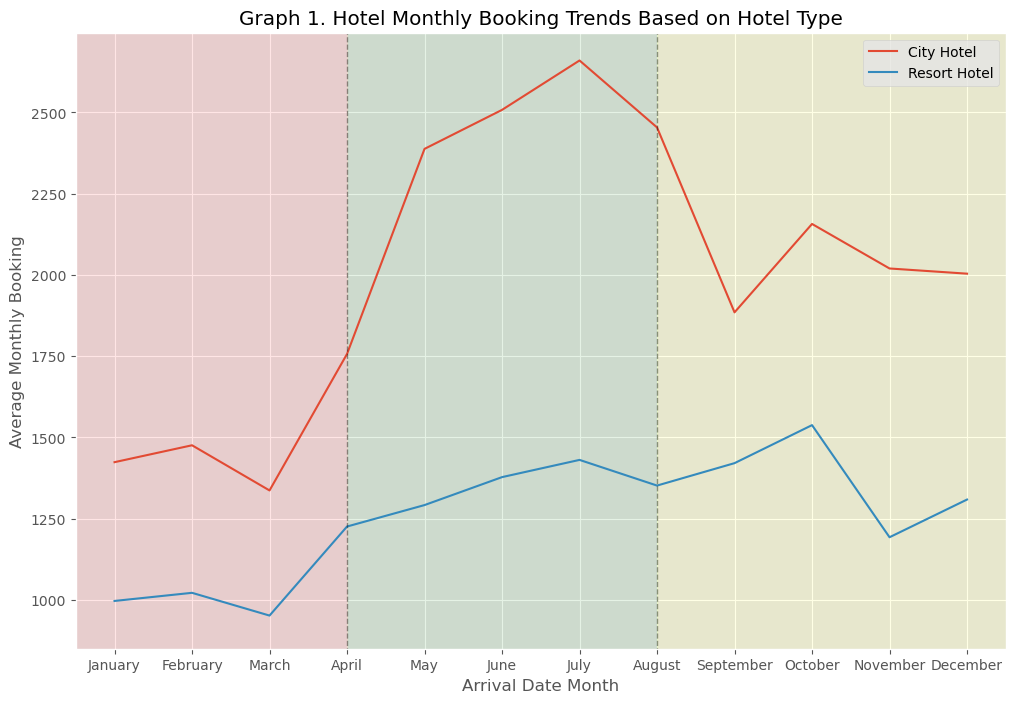

In [59]:
plt.title('Graph 1. Hotel Monthly Booking Trends Based on Hotel Type')
sns.lineplot(data=df_month_book, x='arrival_date_month', y='avg_monthly_booking', hue='hotel')
plt.legend(title='')
plt.xlabel('Arrival Date Month')
plt.ylabel('Average Monthly Booking')
plt.ylim(850)
plt.xlim(-0.5, 11.5)
plt.vlines(3, 700, 2800, ls='--', lw=1, color='black', alpha=.4)
plt.vlines(7, 700, 2800, ls='--', lw=1, color='black', alpha=.4)
plt.fill_between([-0.5, 3], 700, 2800, color='red', alpha=0.1)
plt.fill_between([3, 7], 700, 2800, color='green', alpha=0.1)
plt.fill_between([7, 11.5], 700, 2800, color='yellow', alpha=0.1)

plt.show()

### Insights from Monthly Booking Trends Based on Hotel Type

From graph 1. above, monthly booking trends in a year can be segmented into trimesters with notable breakpoints in April and August. Overall, the average monthly booking of City Hotel is always higher than Resort Hotel. However for monthly trends, let's breakdown the insights based on the aforementioned segments.

#### Trimester 1 (January - April)
The first trimester has the lowest number of bookings for both City Hotel and Resort Hotel with March hitting the lowest for both types. 

This might be attributed to the lack of festivity holidays in this time period in Indonesia. The holidays in this time period are usually short in duration while nearing or being in academic year for most schools. 

The breakpoint in April shows an upward trends in term of monthly booking. This could be attributed to some holidays being close to each other in succession.

#### Trimester 2 (May - August)
The second trimester shows upward trends for both City and Resort Hotel. 

In this trimester, July is the peak of both upward trends with it being the highest peak for City Hotel, while being second highest peak for Resort Hotel. 

There are some holidays being close in succession near the end of May and early June, not to mention June to August is usually the holiday period for most schools, both lower and higher education.

#### Trimester 3 (September - December)
The third trimester has some interesting difference in trends. 

There is a steep drop for City Hotel bookings in September, while Resort Hotel have somewhat upward trend in Resort Hotel. This could be attributed to the data gap where the total booking in September 2017 is way lower, bringing the average down.

Both hotel type share trends where they hit another peak in October and drop in November. While I can't explain the peak in October, the drop in November might be attributed to another lack of holidays in November and academic calendar for university students usually starts around September.